# **Analysis of Puerto Rican Debt Crisis: Correlations and Effects**

By Jenniston Francis, Jugal Joshi, Sudhanvi Konuthula


Professor Backus


Data Bootcamp-UG Spring 2016


May 2016


## Abstract

Puerto Rico is currently suffering from a major debt crisis, with massive debts piling up for the better part of the last decade. As a U.S. territory, Puerto Rico is a unique economic system, legally unable to declare bankruptcy, and has seen its economy and labor market greatly weakened by mounting debts. We seek to analyze Puerto Rico’s historical economic data and investigate the sources and affects of this debt. We would also analyze other economic indicators to investigate what trends have correlated with increasing debt. 

In [1]:
import sys                             # system module
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas
import seaborn.apionly as sns          # fancy matplotlib graphics (no styling)
import xlrd                            # read sheets from excel file

# plotly imports
from plotly.offline import iplot, iplot_mpl  # plotting functions
import plotly.graph_objs as go               # ditto
import plotly                                # just to print version and init notebook
import cufflinks as cf                       # gives us df.iplot that feels like df.plot
cf.set_config_file(offline=True, offline_show_link=False)

# these lines make our graphics show up in the notebook
%matplotlib inline             
plotly.offline.init_notebook_mode()

print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Plotly version: ', plotly.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.1 |Anaconda 2.4.1 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.17.1
Plotly version:  1.9.10
Today:  2016-05-13


## Rising Debt
Puerto Rico's Debt has increased rapidly over the last decade. The following data is the value of Puerto Rico's Gross Public Debt, divided into Total, Public Enterprises, Central Government and Municipal. We accessed the data through the PR Governement Development Bank statistics at: http://www.gdb-pur.com/economy/statistical-appendix.html. We then clicked on the Gross Public Debt link, which downloads the excel sheet. The excel sheet was then cleaned of all extraneous cells and produced the following clean data when read in. The data is in millions of dollars and is divided into 4 categories, as shown. 
 

In [3]:
file1 = '/users/jennistonRFrancis/Data_Bootcamp/PR_GrossNationalDebt_Clean.xlsx'
data1 = pd.read_excel(file1)
data1= data1.T #Transpose, Years to rows
data1.columns=[ 'Total', 'Public Enterprises','Central Government', 'Municipal'] #Rename Columns
data1.index.name = 'Year'#Name Index
data1

,Total,Public Enterprises,Central Government,Municipal
Year,,,,
2005,36702.9,25504.0,9017.6,2181.4
2006,39933.3,27209.7,10393.3,2330.3
2007,42818.3,29796.4,10558.9,2463.0
2008,46932.2,34320.6,9792.2,2819.4
2009,52980.1,40044.0,9938.8,2997.3
2010,56823.1,43288.3,10303.4,3231.4
2011,58942.0,45042.2,10362.8,3537.0
2012,64760.3,49044.7,11844.1,3871.5
2013,64957.1,48746.4,12328.7,3882.0


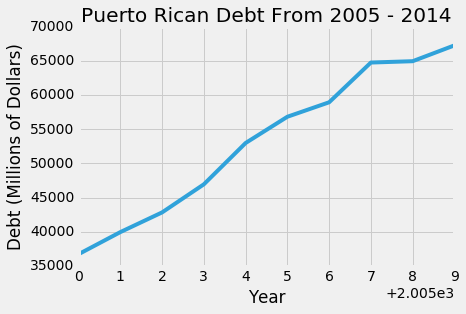

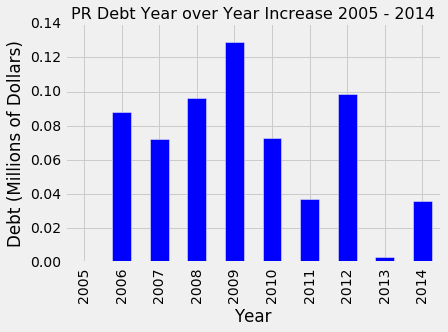

In [4]:
plt.style.use('fivethirtyeight')
data1['Total'].plot()
plt.ylabel('Debt (Millions of Dollars)')
plt.xlabel('Year')
plt.title('Puerto Rican Debt From 2005 - 2014')
plt.show()
data1['Total'].pct_change().plot(kind='bar')
plt.ylabel('Debt (Millions of Dollars)')
plt.xlabel('Year')
plt.title('PR Debt Year over Year Increase 2005 - 2014', fontsize=16 )
plt.show()

As seen above, the total value of Puerto Rico's debt has increased drastically over the past 9 years. From a low of 36,702.9 in 2005, the value of Puerto Rico’s debt has nearly doubled to 67,272.9 in 2014. Year over Year Increases have consistently been positive and high around 9% on average, except in 2013 when the government attempted to reduce borrowing by heavily restricting the bond market.

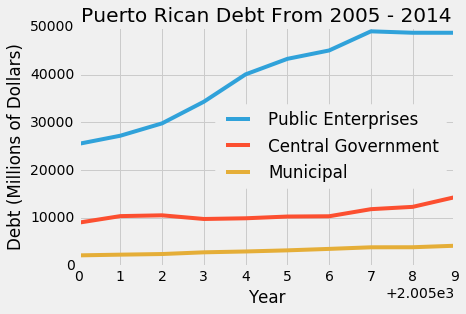

In [5]:
plt.plot(data1.index, data1['Public Enterprises'])
plt.plot(data1.index, data1['Central Government'])
plt.plot(data1.index, data1['Municipal'])
plt.ylabel('Debt (Millions of Dollars)')
plt.xlabel('Year')
plt.title('Puerto Rican Debt From 2005 - 2014')
plt.legend(loc= 'center right')
plt.show()

When broken down into constituent categories, Puerto Rico's debt has increased in all aspects over the last 9 years that the data was available. In terms of total amount, Public Enterprise debt accounts for the largest amount of total debt, totaling 48,744.0 million dollars in 2014. In addition, Public Enterprise debt also had the highest Year over Year percent increase, with a peak Y/Y increase in 2009 of 14.97%. The percent increases are likely due to the fact that public enterprises have the most freedom in taking on debt and are less hurdled by regulation. The central government and municipalities, on the other hand, are more regulated in taking on debt.

   Since 2006, which marked the start of the economic downturn and pronounced debt crisis, Puerto Rico’s population has experienced a steady decline. It decreased from 3,800,000 in 2006 to 3,550,000 in 2014 and continues to fall even in the present-day. These 250,000 people have left the island for a place they view as more stable - the United States mainland. 
   
   People are leaving because they have been left with no choice. Having to decide between between funding health-care services, keeping schools open, and creating jobs versus servicing its debt, the Puerto Rican government has often chosen the latter. As a result, many local schools have been shut down and the number of available jobs has decreased. Native Puerto Ricans, fearing that their children will have no futures, have therefore left for America.

## A Misleading Unemployment Rate

The following data is the unemployment rate of Puerto Rico from 2006 to 2014. The data was accessed through the Bureau of Labor Statistics at: http://www.bls.gov/eag/eag.pr.htm. In the data series located on the page, we clicked on the green image of a graph in the cell where 'Unemployment' and 'Back Data' intersect to download the data.

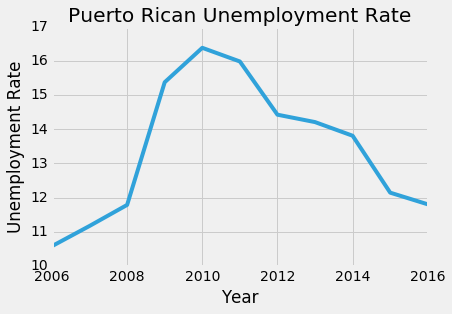

In [111]:
#unemployment data

import pandas as pd
file2 = "/Users/jujo2/Documents/Data bootcamp directory/SeriesReport-20160512203040_e696f6.xlsx"
data2 = pd.read_excel(file2, na_values = 'NaN')
data2 = data2.drop([0,1,2,3,4,5,6,7,8])           #drop unnecessary rows
data2 = data2.T.set_index(9)                      #shaping data
data2.index.name = 'Month'                        #rename index to meaningful title
data2 = data2.T.set_index('Year')                 #continue shaping data

data2['Annual'].plot()                      
plt.title('Puerto Rican Unemployment Rate')
plt.ylabel('Unemployment Rate')
plt.show()

Since 2010, Puerto Rico has seen a decline in its unemployment rate. The current unemployment rate is just below 12%, over twice that of the United States. While in most cases, a declining unemployment rate would signal economic growth, the reality in Puerto Rico is exactly the opposite. Due to the economic downturn, the unemployment rate should be approximately double its current value. The reason for the disparity between the actual unemployment rate and its logical value is the recent population outflux that the territory has experienced.

## The Population Problem

Puerto Rico's population has also exhibited a decline. The following graph is the population of Puerto Rico from 2006 to 2014. The data was accessed through the World Bank at: http://data.worldbank.org/country/puerto-rico. We then clicked on the 'databank' option and chose years of choice and 'Population, Total' as our indicator of choice, and clicked 'CSV' in the 'download options' dropdown to download the data.

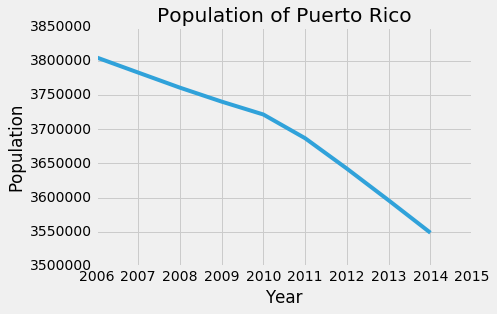

In [96]:
#population data

file3 = "/Users/jujo2/Documents/Data bootcamp directory/PR_World_Bank.csv"
wa = pd.read_csv(file3, na_values=['..'])
wb = wa.drop(['Country Code', '﻿Country Name', 'Series Code'], axis=1)
wb = wb.set_index(['Series Name'])
wc = wb.T.dropna(axis=1, how='all')
wc_reset = wc.reset_index()

#renaming years to make more legible 
old_years = ['1990 [YR1990]', '2000 [YR2000]', '2006 [YR2006]', '2007 [YR2007]',
             '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
             '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]']
new_years = ['1990', '2000', '2006', '2007',
             '2008', '2009', '2010', '2011',
             '2012', '2013', '2014', '2015']
wd = wc_reset.replace(old_years, new_years)


wf = wd.set_index('index')          #set index back to years
wf = wf.drop(['1990','2000'])       #only want data from 2006 to 2015

plt.style.use('fivethirtyeight')
wf['Population, total'].plot()
plt.title('Population of Puerto Rico')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

## Change in GDP: A Startling Trend

The following data is Puerto Rican GDP data of from 2005 to 2011. The data was accessed through theglobaleconomy.com at: http://www.theglobaleconomy.com/indicators_data_export.php. To access the data, a free account must be created with the website. 

Select these indicators: 'GDP current U.S. dollars', 'GDP constant dollars', 'Capital investment percent of GDP', 'Household consumption percent of GDP', 'Government spending  percent of GDP', and 'Trade balance percent of GDP'.

Select Puerto Rico under 'Select Country' (disregard the innaccuracy)

Click 'download the CSV' to download the data.

In [112]:
#GDP current U.S. dollars, GDP Constant dollars, and GDP breakdown by percentage

file4 = "/Users/jujo2/Documents/Data bootcamp directory/13-05-16 03-42-46_theglobaleconomy.csv"
df4 = pd.read_csv(file4)

#deleting unnecessary columns
del df4['Unnamed: 9']
del df4["'Country"]
del df4["code"]           

df4 = df4.set_index('year')          #setting year to index
df4

,GDP current U.S. dollars,GDP constant dollars,Capital investment percent of GDP,Household consumption percent of GDP,Government spending percent of GDP,Trade balance percent of GDP
year,,,,,,
2005,83.91,83.9,14.60,56.09,11.99,17.32
2006,87.28,83.2,13.99,57.46,11.84,16.71
2007,89.52,80.4,13.39,58.18,11.74,16.69
2008,93.64,79.0,12.15,58.26,11.23,18.36
2009,96.39,77.1,10.43,57.19,11.52,20.86
2010,98.38,75.1,9.16,57.72,11.02,22.10
2011,100.35,73.7,10.07,58.06,10.47,21.40


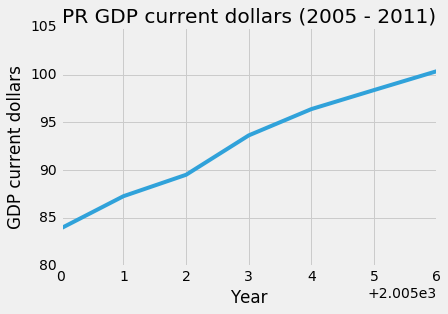

In [113]:
df4['GDP  current U.S. dollars'].plot()
plt.title('PR GDP current dollars (2005 - 2011)')
plt.xlabel('Year')
plt.ylabel('GDP current dollars')
plt.show()

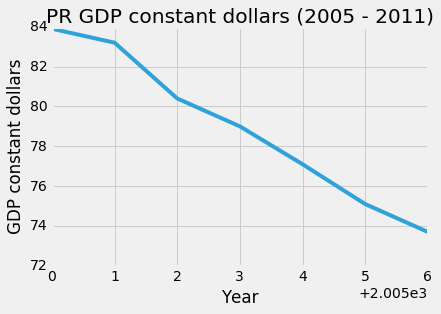

In [114]:
df4['GDP  constant dollars'].plot()
plt.title('PR GDP constant dollars (2005 - 2011)')
plt.xlabel('Year')
plt.ylabel('GDP constant dollars')
plt.show()

Since 2005, Puerto Rico’s Gross Domestic Product, the best measure of its economic health, has seen a steady increase in terms of current US Dollars. But when GDP is adjusted for inflation, a steady decrease is seen instead. 
The source of this decrease is quite clear. Three of the main components of GDP - consumer spending, investment spending, and government spending, have all decreased during this time period as well. While net trade has gone up, the increase has not been enough to counter the decline in the other three components. 

To make matters worse, 66% of Puerto Rico’s current GDP is funded by public debt. This means that in order to keep the economy from collapsing altogether, the island must continue to take on more and more debt.

## Conclusion

Puerto Rico has the population of Oklahoma and an economy smaller than Kansas. However, it also has more debt than any US state government except for California and New York. Moreover, the island territory is not an emerging market and has no sectors that can generate substantial income.

Unfortunately, these realities, coupled with growing debt and a shrinking number of taxpayers, appear to have the island trapped in an economic death spiral. Those who stay face even higher bills, and those who leave ensure that production will drop and GDP will continue to falter. 

Puerto Rico is a long way from becoming free of its burden, and it is doubtful that it will ever will.